# 머신 러닝 (3)

## 5) K-Fold Cross Validation

* 데이터셋을 분할하여 반복 학습, 평가
* 모든 데이터를 학습과 평가에 사용함으로써 좀 더 일반화된 모델을 만들 수 있다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [3]:
# 상위 데이터 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 기초통계량 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 범주값 개수 확인
data['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


### 2. 데이터 전처리

**1) x, y 분리**

In [7]:
# target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

In [8]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 성능 예측

### 3.1.Decision Tree

In [10]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier

# K-Fold Cross Validation을 통해 최적의 model을 선정한다.
from sklearn.model_selection import cross_val_score

In [11]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=2022)

In [12]:
# 학습, 예측, 평가하기
# 학습 성능을 비교하기 위해 x_train, y_train으로 제한
cv_score = cross_val_score(model, x_train, y_train, cv=20)

# 확인
print(cv_score) # 20개의 accuracy_score 출력
print('평균: ', cv_score.mean())
print('표준 편차: ', cv_score.std())

[1.  1.  1.  1.  1.  1.  0.8 1.  0.8 1.  0.8 0.6 0.8 1.  0.8 1.  1.  1.
 1.  1. ]
평균:  0.93
표준 편차:  0.11445523142259598


### 3.2.KNN

In [13]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = KNeighborsClassifier()

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=20)

# 확인
print(cv_score)
print('평균: ', cv_score.mean())
print('표준편차: ', cv_score.std())

[1.  1.  1.  1.  1.  1.  0.8 1.  0.8 1.  1.  0.6 1.  1.  0.8 1.  1.  1.
 1.  1. ]
평균:  0.95
표준편차:  0.10723805294763608


### 3.3.Logistic Regression

In [14]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LogisticRegression(max_iter=500)

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균: ', cv_score.mean())
print('표준편차: ', cv_score.std())

[1.         1.         0.90909091 1.         0.81818182 0.9
 0.7        0.9        1.         1.        ]
평균:  0.9227272727272726
표준편차:  0.09571393328451919


## 6) Hyperparameter 튜닝

* 최적의 Hyperparameter를 찾는 과정  

In [15]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [17]:
# 상위 데이터 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [18]:
# 기초통계량 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


### 2. 데이터 전처리

**1) x, y 분리**

In [19]:
# target 확인
target = 'happiness'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [20]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# stratify : 데이터를 분리한 후에도 원본 데이터셋의 값의 비율을 유지하는 옵션.
# 값을 그룹화했을 때 요소가 1개인 그룹이 존재하여 에러 발생.
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022, stratify=y)

### 3. 모델링

### 3.1. KNN

In [21]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 선언하기
model = KNeighborsRegressor()

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print('평균: ', cv_score.mean())
print('표준편차: ', cv_score.std())

[0.75645865 0.59535152 0.70598723 0.65639867 0.696015   0.62791563
 0.6881329  0.66550486 0.50962442 0.51250282]
평균:  0.6413891695318414
표준편차:  0.0772426983351561


### 3.2. Decision Tree

In [22]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state=2022)

# 학습, 예측, 평가하기
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')

# 확인
print(cv_score)
print('평균: ', cv_score.mean())
print('표준편차: ', cv_score.std())

[0.69842077 0.63262634 0.72656258 0.55425506 0.72794541 0.670206
 0.69790477 0.60060926 0.29075661 0.51822282]
평균:  0.6117509619179523
표준편차:  0.12676141688711576


### 4. 성능 튜닝

* cv_score로 학습용 데이터 기반 예측 성능이 뛰어난 모델을 선발하고, 해당 모델을 튜닝한 다음 평가한다.

In [23]:
rand_param = {'n_neighbors': range(1, 51)}
grid_param = {'n_neighbors': [34, 35, 36, 37, 38]}

In [24]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
# 선언하기
model_knn = KNeighborsRegressor()

In [26]:
# Random Search 모델 선언하기
model = RandomizedSearchCV(model_knn, # 기본 모델
                          rand_param, # 튜닝용 파라미터 변수
                          cv=10, # cv 수행 횟수
                          n_iter=20, # Random Search 수행 횟수 (200번 cv 수행)
                          scoring='r2', # 평가 지표
                          n_jobs=-1) # CPU 병렬 처리

In [27]:
# Grid Search 모델 선언하기
model = GridSearchCV(model_knn,
                    grid_param,
                    cv=10,
                    scoring='r2',
                    n_jobs=-1)

In [28]:
# 모델 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [34, 35, 36, 37, 38]}, scoring='r2')

In [29]:
# 결과 확인
print('=' * 70)
print(model.cv_results_['param_n_neighbors'].data)
print('-' * 70)
print(model.cv_results_['mean_test_score'])
print('-' * 70)
print('최적 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_)

[34 35 36 37 38]
----------------------------------------------------------------------
[0.70596767 0.70572338 0.70636124 0.70450201 0.70453492]
----------------------------------------------------------------------
최적 파라미터 : {'n_neighbors': 36}
최고 성능 : 0.7063612407955512


In [30]:
# 예측하기
y_pred = model.predict(x_test)

In [31]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 0.5642480256205556
R2-Score: 0.757096529657483


## 7) 앙상블

In [32]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [33]:
# 상위 데이터 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [34]:
# 기초통계정보 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


### 2. 데이터 준비

**1) x, y 분리**

In [35]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

In [36]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [37]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

## 3. 모델링

### 3.1.RandomForest

In [38]:
# 1단계 : 불러오기
from sklearn.ensemble import RandomForestClassifier

In [39]:
# 2단계 : 선언하기
model = RandomForestClassifier(max_depth=10, random_state=2022)

In [40]:
# 3단계 : 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [41]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

In [42]:
# 5단계 : 평가하기
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80  3]
 [11 56]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        83
           1       0.95      0.84      0.89        67

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



### 3.2.XGBoost

In [43]:
# xgboost 설치
!pip install xgboost

In [44]:
# 1단계 : 불러오기
from xgboost import XGBClassifier

In [45]:
# 2단계 : 선언하기
model = XGBClassifier(max_depth=10, random_state=2022, n_estimate=20)

In [46]:
# 3단계 : 학습하기
model.fit(x_train, y_train)

[20:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimate=20, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

In [48]:
# 5단계 : 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  6]
 [12 55]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        83
           1       0.90      0.82      0.86        67

    accuracy                           0.88       150
   macro avg       0.88      0.87      0.88       150
weighted avg       0.88      0.88      0.88       150



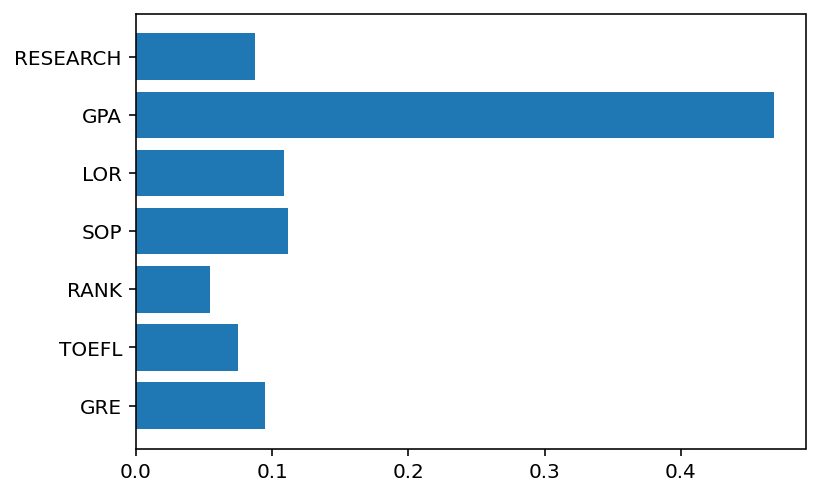

In [49]:
# 변수 중요도 확인
plt.barh(list(x), model.feature_importances_)
plt.show()